## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### TweetsPPKM
#### 1.Kasus yang diambil adalah **Analisis Sentimen Publik terhadap Kebijakan PPKM di Indonesia berdasarkan Tweet Twitter**.  Dataset ini berisi kumpulan tweet dari pengguna Twitter di Indonesia yang membahas tentang kebijakan **Pemberlakuan Pembatasan Kegiatan Masyarakat (PPKM)**.  Tujuannya adalah untuk mengetahui bagaimana persepsi masyarakat terhadap kebijakan tersebut — apakah bersentimen **positif**, **netral**, atau **negatif**.


##### 2. Penjelasan Setiap Kolom Data

Penjelasan kolom pada dataset:

- **Date** → Waktu kapan tweet diposting.
- **User** → Nama pengguna atau akun Twitter yang menulis tweet.
- **Tweet** → Isi teks atau konten dari tweet yang akan dianalisis.
- **sentiment** → Label hasil anotasi sentimen:
  - `1` = Sentimen positif
  - `0` = Sentimen netral
  - `-1` = Sentimen negatif


#### 3.Import library

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


#### 4.Load Data

In [26]:
# Membaca file dataset
file_path = "INA_TweetsPPKM_Labeled_Pure.csv"
data = pd.read_csv(file_path, sep="\t")

# Menampilkan informasi awal dataset
print("Jumlah data:", len(data))
print("Nama kolom:", data.columns.tolist())

# Menampilkan 5 baris pertama dataset
data.head()


Jumlah data: 23644
Nama kolom: ['Date', 'User', 'Tweet', 'sentiment']


,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1.Jumlah baris dan kolom data
Langkah pertama adalah melihat seberapa besar dataset yang kita miliki.  
Informasi jumlah baris dan kolom membantu memahami banyaknya data (observasi) dan fitur (atribut) yang tersedia.


In [27]:
# 1. Jumlah baris dan kolom
print("Jumlah baris data:", data.shape[0])
print("Jumlah kolom data:", data.shape[1])


Jumlah baris data: 23644
Jumlah kolom data: 4


#### 2. Panjang rata-rata setiap baris (tweet)
Setiap tweet memiliki panjang teks yang berbeda.  
Dengan menghitung rata-rata panjang tweet, kita bisa memperkirakan karakteristik gaya menulis pengguna di media sosial.


In [28]:
# 2. Panjang rata-rata setiap baris tweet
data['tweet_length'] = data['Tweet'].astype(str).apply(len)
print("Rata-rata panjang tweet:", round(data['tweet_length'].mean(), 2))


Rata-rata panjang tweet: 175.92


#### 3. Cek data duplikasi
Langkah ini penting untuk memastikan bahwa tidak ada data ganda (duplikat) yang bisa memengaruhi hasil analisis.


In [29]:
# 3. Cek data duplikat
print("Jumlah data duplikat:", data.duplicated().sum())


Jumlah data duplikat: 0


#### 4. Cek data kosong (missing values)
Data kosong (missing values) bisa menyebabkan error atau bias pada model analisis sentimen.  
Kita perlu tahu kolom mana yang memiliki nilai kosong dan berapa banyak.


In [30]:
# 4. Cek data kosong
print("Jumlah data kosong per kolom:\n", data.isnull().sum())


Jumlah data kosong per kolom:
 Date            0
User            0
Tweet           0
sentiment       0
tweet_length    0
dtype: int64


#### 5. Distribusi data sentimen
Visualisasi distribusi label sentimen membantu melihat keseimbangan kelas (positif, netral, negatif).  
Selain itu, kita juga dapat menampilkan kata yang sering muncul menggunakan **word cloud**.


C:\Users\Febry Widiana\AppData\Local\Temp\ipykernel_10844\2544590098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='pastel')


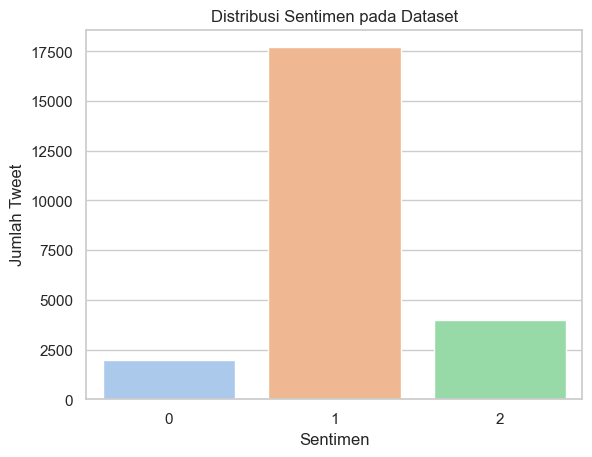

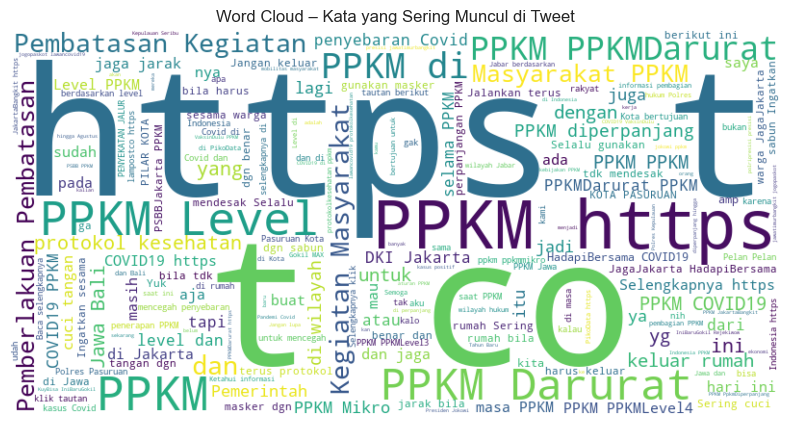

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Bar Chart: distribusi sentimen
sns.countplot(x='sentiment', data=data, palette='pastel')
plt.title("Distribusi Sentimen pada Dataset")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()

# Word Cloud: kata yang sering muncul
all_words = ' '.join(data['Tweet'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Kata yang Sering Muncul di Tweet")
plt.show()


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi
Tokenisasi adalah proses memecah kalimat menjadi potongan-potongan kata (token).  
Langkah ini penting agar teks bisa dianalisis secara lebih detail per kata.


In [35]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenisasi setiap tweet
data['tokens'] = data['Tweet'].astype(str).apply(word_tokenize)
data[['Tweet', 'tokens']].head()


[nltk_data] Downloading package punkt to C:\Users\Febry
[nltk_data]     Widiana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Febry
[nltk_data]     Widiana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,Tweet,tokens
0,Ketahui informasi pembagian #PPKM di wilayah J...,"[Ketahui, informasi, pembagian, #, PPKM, di, w..."
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,"[Tempat, Ibadah, di, Wilayah, PPKM, Level, 1, ..."
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...","[Juru, bicara, Satgas, Covid-19, ,, Wiku, Adis..."
3,Ketahui informasi pembagian #PPKM di wilayah J...,"[Ketahui, informasi, pembagian, #, PPKM, di, w..."
4,Kementerian Agama menerbitkan Surat Edaran Nom...,"[Kementerian, Agama, menerbitkan, Surat, Edara..."


#### 2. Lemmatization
Lemmatization mengubah kata ke bentuk dasar secara gramatikal (misalnya: *running → run*, *better → good*).  
Berbeda dengan stemming, hasil lemmatization lebih alami secara bahasa.


In [36]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

data['lemmatized'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x])
data[['Tweet', 'lemmatized']].head()


[nltk_data] Downloading package wordnet to C:\Users\Febry
[nltk_data]     Widiana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Febry
[nltk_data]     Widiana\AppData\Roaming\nltk_data...


,Tweet,lemmatized
0,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, #, ppkm, di, w..."
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,"[tempat, ibadah, di, wilayah, ppkm, level, 1, ..."
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...","[juru, bicara, satgas, covid-19, ,, wiku, adis..."
3,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, #, ppkm, di, w..."
4,Kementerian Agama menerbitkan Surat Edaran Nom...,"[kementerian, agama, menerbitkan, surat, edara..."


#### 3. Stemming
Stemming mengubah kata menjadi bentuk dasarnya tanpa memperhatikan konteks (misalnya: *studying → study*, *happily → happi*).  
Biasanya dilakukan setelah lemmatization untuk memperkuat penyederhanaan kata.


In [37]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

data['stemmed'] = data['lemmatized'].apply(lambda x: [stemmer.stem(word) for word in x])
data[['Tweet', 'stemmed']].head()


,Tweet,stemmed
0,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, #, ppkm, di, w..."
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,"[tempat, ibadah, di, wilayah, ppkm, level, 1, ..."
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...","[juru, bicara, satga, covid-19, ,, wiku, adisa..."
3,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, #, ppkm, di, w..."
4,Kementerian Agama menerbitkan Surat Edaran Nom...,"[kementerian, agama, menerbitkan, surat, edara..."


#### 4. Stopword Removal (hapus tanda baca, angka, dan kata tidak penting)
Stopword removal menghapus kata-kata umum seperti "dan", "yang", "di", serta tanda baca dan angka.  
Langkah ini bertujuan untuk mempertahankan kata yang bermakna saja dalam analisis sentimen.


In [38]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

def clean_tokens(tokens):
    return [
        word for word in tokens
        if word.isalpha() and word not in stop_words
    ]

data['cleaned'] = data['stemmed'].apply(clean_tokens)
data[['Tweet', 'cleaned']].head()


[nltk_data] Downloading package stopwords to C:\Users\Febry
[nltk_data]     Widiana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,cleaned
0,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, ppkm, wilayah,..."
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,"[ibadah, wilayah, ppkm, level, berkapasita, pe..."
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...","[juru, bicara, satga, wiku, adisasmito, bukber..."
3,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, ppkm, wilayah,..."
4,Kementerian Agama menerbitkan Surat Edaran Nom...,"[kementerian, agama, menerbitkan, surat, edara..."


#### 5. Text Normalisasi
Normalisasi teks digunakan untuk menyeragamkan tulisan, seperti mengganti kata gaul, singkatan, atau ejaan tidak baku menjadi bentuk standar.


In [39]:
normalisasi_dict = {
    "gk": "tidak", "nggak": "tidak", "tdk": "tidak", "yg": "yang", 
    "dr": "dari", "tp": "tapi", "ga": "tidak", "dgn": "dengan", "sm": "sama"
}

def normalisasi_teks(tokens):
    return [normalisasi_dict.get(word, word) for word in tokens]

data['normalized'] = data['cleaned'].apply(normalisasi_teks)
data[['Tweet', 'normalized']].head()


,Tweet,normalized
0,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, ppkm, wilayah,..."
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,"[ibadah, wilayah, ppkm, level, berkapasita, pe..."
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...","[juru, bicara, satga, wiku, adisasmito, bukber..."
3,Ketahui informasi pembagian #PPKM di wilayah J...,"[ketahui, informasi, pembagian, ppkm, wilayah,..."
4,Kementerian Agama menerbitkan Surat Edaran Nom...,"[kementerian, agama, menerbitkan, surat, edara..."


#### 6. Labeling Data (Lexicon-based menggunakan VADER)
Tahap ini menentukan label sentimen dari setiap tweet berdasarkan analisis leksikon (Lexicon-based Sentiment Analysis). Kita akan menggunakan **VADER (Valence Aware Dictionary for Sentiment Reasoning)**.



In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(' '.join(text))
    if score['compound'] > 0.05:
        return 1  # positif
    elif score['compound'] < -0.05:
        return -1  # negatif
    else:
        return 0   # netral

data['predicted_sentiment'] = data['normalized'].apply(get_sentiment)
data[['Tweet', 'predicted_sentiment']].head()


[nltk_data] Downloading package vader_lexicon to C:\Users\Febry
[nltk_data]     Widiana\AppData\Roaming\nltk_data...


,Tweet,predicted_sentiment
0,Ketahui informasi pembagian #PPKM di wilayah J...,0
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,0
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",0
3,Ketahui informasi pembagian #PPKM di wilayah J...,0
4,Kementerian Agama menerbitkan Surat Edaran Nom...,0


#### 7. Text Vektorisasi
Vektorisasi mengubah teks menjadi representasi numerik agar bisa dibaca oleh algoritma machine learning.  
Metode yang digunakan: **TF-IDF (Term Frequency–Inverse Document Frequency)**.


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Tweet'].astype(str))
print("Shape TF-IDF matrix:", X.shape)


Shape TF-IDF matrix: (23644, 1000)


#### 8. Data Splitting
Data dibagi menjadi **data latih dan data uji** untuk proses pelatihan model.  
Di sini digunakan rasio **80:20** (0.8 untuk training, 0.2 untuk testing).


In [45]:
from sklearn.model_selection import train_test_split

y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 18915
Jumlah data uji: 4729


#### 9. Matrix correlation 


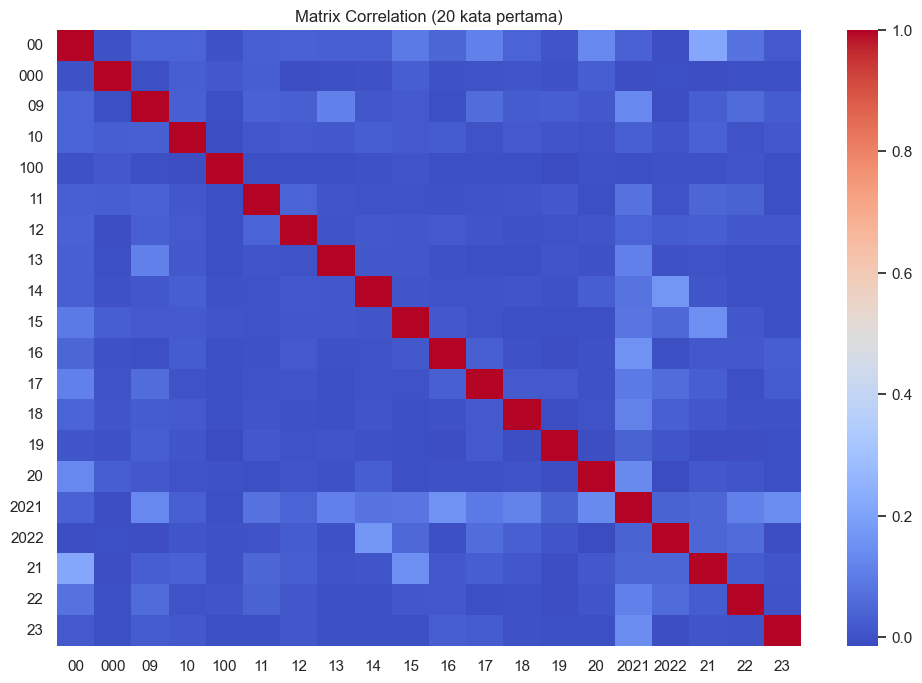

In [46]:
# === Matrix Correlation ===
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hasil TF-IDF sebagai DataFrame
tfidf_matrix_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Hitung korelasi antar kata
corr_matrix = tfidf_matrix_df.corr()

# Tampilkan heatmap korelasi (gunakan subset agar tidak terlalu padat)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.iloc[:20, :20], cmap="coolwarm", annot=False)
plt.title("Matrix Correlation (20 kata pertama)")
plt.show()


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih

Penjelasan tentang Model yang Dipilih

Dalam proyek analisis sentimen ini, model yang digunakan adalah Logistic Regression, yang merupakan salah satu algoritma machine learning supervised learning paling umum untuk klasifikasi biner (misalnya: positif dan negatif).

Alasan Pemilihan Model:

Logistic Regression mampu memprediksi probabilitas dari setiap kelas.

Mudah diimplementasikan dan diinterpretasikan.

Cocok digunakan untuk TF-IDF vectorized text data, karena bekerja efektif dengan data yang sudah diubah menjadi bentuk numerik.

Cepat untuk dilatih dan tidak memerlukan banyak sumber daya komputasi.

Tujuan Penggunaan Model:
Model ini digunakan untuk memprediksi sentimen dari teks tweet, apakah termasuk kategori positif, negatif, atau netral berdasarkan pola kata yang muncul dalam data pelatihan.

In [47]:
# Import library untuk modeling dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Pisahkan fitur dan label
X = vectorizer.fit_transform(data['Tweet'].astype(str))
y = data['sentiment']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Tampilkan akurasi
print("Akurasi Model:", accuracy_score(y_test, y_pred))


Akurasi Model: 0.8538803129625714


## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

#### 1. Confusion Matrix

Confusion Matrix digunakan untuk melihat perbandingan antara label aktual dengan hasil prediksi model.
Matriks ini membantu memahami sejauh mana model mampu membedakan tiap kategori sentimen.

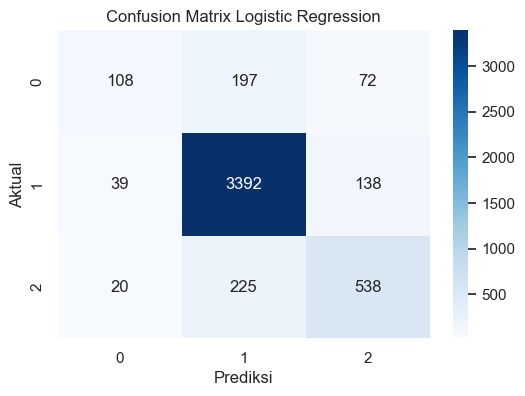

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


#### 2. Laporan Klasifikasi (Classification Report)

Menampilkan nilai precision, recall, dan f1-score untuk setiap kelas sentimen.
Nilai-nilai ini memberikan gambaran performa model terhadap tiap kategori data.

In [49]:
# Classification Report
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.65      0.29      0.40       377
           1       0.89      0.95      0.92      3569
           2       0.72      0.69      0.70       783

    accuracy                           0.85      4729
   macro avg       0.75      0.64      0.67      4729
weighted avg       0.84      0.85      0.84      4729

